# 作業
- 作業目標 : 用 iris (dataset.load_iris()) 資料嘗試跑 hierarchical clustering

In [27]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

載入 相關套件 並 執行 hierarchical clustering 實驗 ...

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import AgglomerativeClustering
np.random.seed(5)
%matplotlib inline

In [20]:
estimator = [("hc_ward",AgglomerativeClustering(n_clusters=3, linkage= "ward")),
            ("hc_complete", AgglomerativeClustering(n_clusters=3, linkage="complete")),
            ("hc_average", AgglomerativeClustering(n_clusters=3,linkage="average"))]

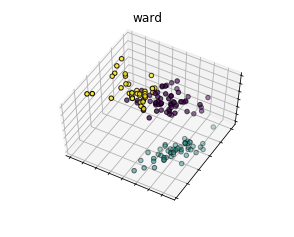

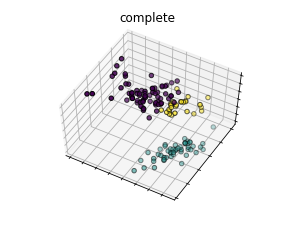

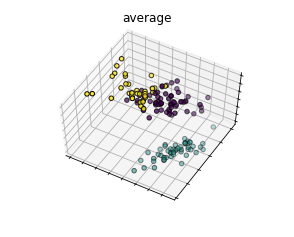

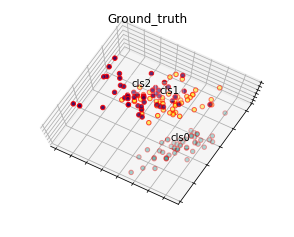

In [28]:
fignum =1 
titles = ["ward", "complete", "average"]
for name,est in estimator:
    fig = plt.figure(fignum, figsize=(4,3))
    ax = Axes3D(fig, rect= [0,0,.95,1], elev= 60, azim =120)
    #fit X
    est.fit(X)
    labels = est.labels_
    ax.scatter(X[:,0],X[:,1],X[:,2], 
              c= labels.astype(np.float), edgecolor ="k")
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum-1])
    ax.dist = 12
    fignum = fignum+1
    
#plot ground truth
fig =plt.figure(fignum, figsize= (4,3))
ax = Axes3D(fig, rect= [0,0,.95,1], elev=80, azim =120)

for name, label in [('cls0',0),
                  ('cls1',1),
                  ('cls2',2)]:
    ax.text3D(X[y == label,0].mean(),
              X[y == label,1].mean(),
              X[y == label,2].mean()+2,name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
y= np.choose(y, [1,2,0]).astype(np.float)
ax.scatter(X[:,0], X[:,1],X[:,2], c=y, edgecolor = 'r')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground_truth')
ax.dist=10

    